# QML frameworks

There are two most popular frameworks for quantum machine learning: pennylane (Bergholm et al. 2022) by Xanadu and TensorFlow Quantum (Broughton et al. 2021) from Google. There is also popular qiskit (Aleksandrowicz et al. 2019) framework from IBM, designed more for general quantum computing than for quantum machine learning, but it can also be used for ML (see for example [qiskit QML tutorials](https://qiskit.org/ecosystem/machine-learning/tutorials/index.html)).

In general these frameworks provide:
- interface for defining quantum circuits
- classical simulators of quantum circuits for easy small scale noiseless experiments
- interface for running circuits on real quantum hardware by different providers
- interface for seamless integration with classical machine learning frameworks (Pytorch and Tensorflow), which allow:
  - integration of quantum models to existing ML pipelines
  - constructing hybrid quantum/classical model


Except for fast circuit result prediction, ML tasks usually require efficient ways of gradients estimating. There are several popular derivative counting algorithms suitable for simulation or for real quantum hardware

### Finite difference
This is the simples default technic available both in simulation and on hardware. Works pretty bed with sampling based methods due to significant noise.

Can be expressed as:


$$\nabla_{\theta_i}\mathcal{M}_{\theta_i}(\hat{B}) = \frac{[\mathcal{M}_{\theta_i + d\theta}(\hat{B}) - \mathcal{M}_{\theta_i}(\hat{B})]}{d\theta}$$

or as

$$\frac{\partial}{\partial \alpha} f(\alpha) = \frac{1}{d\alpha} \cdot \left( f\left(\alpha + d\alpha\right) -  f\left(\alpha \right) \right)  $$

### Parameter shift
Parameter shifting rule is much more noise resistent technic compatible with sampling. 
It was first introduced to quantum machine learning in [Mitarai et al. (2018)](https://arxiv.org/abs/1803.00745 "‌"), and extended in [Schuld et al. (2018)](https://arxiv.org/abs/1811.11184 "‌").

In these works it was proved, that for any one qubit gate such a wonder full property is fulfilled. For these gates exist finite constants $с$ and $s$ that

$$\nabla_{\theta_i}\mathcal{M}_{\theta_i}(\hat{B}) = c[\mathcal{M}_{\theta_i + s}(\hat{B}) - \mathcal{M}_{\theta_i - s}(\hat{B})],$$
which means that infinitely small difference can be replaced with some specific big difference, but equality will still hold.

For example for PauliY gate \
$|\alpha⟩ = Y^{\alpha}|0⟩$ \
$f(\alpha) = ⟨\alpha|X|\alpha⟩$

$$\frac{\partial}{\partial \alpha} f(\alpha) = \frac{\pi}{2} f\left(\alpha + \frac{1}{2}\right) -  \frac{ \pi}{2} f\left(\alpha - \frac{1}{2}\right)$$

## Simulation technics
Since simulators play important role in research process, tricks that improve algorithm running speed only in simulation were also developed, although they will loose their significance in post NISQ era.

### Adjoint method
Detailed tutorial with theory explanations can be found in [demo](https://pennylane.ai/qml/demos/tutorial_adjoint_diff.html) from pennyLane.

But in a nutshell this method accelerate gradient evaluation by exploiting reversibility of quantum operations. While inverse matrix computation in general is relatively slow, for unitary matrix representing quantum operations by definition inverse equals to adjoint (transposition + complex conjugate) with is almost computationally free.

Considering this, algorithm is as follows:

$$\langle M \rangle = \langle b | k \rangle = \langle \Psi | M | \Psi \rangle$$

Firstly decompose the expectation into the scalar product of two vectors

$$\langle b | = \langle \Psi| M = \langle 0 | U_0^{\dagger} \dots U_n^{\dagger} M$$
$$| k \rangle =  |\Psi \rangle = U_n U_{n-1} \dots U_0 |0\rangle$$

change the location of the partition by transferring the matrices in turn from one vector to another.

$$\langle b_i | = \langle 0 | U_1^{\dagger} \dots U_n^{\dagger} M U_n \dots U_{i+1}$$
$$|k_i \rangle = U_{i-1} \dots U_1 |0\rangle$$

$$\langle b_i | = \langle b_{i+1}| U_{i}$$
$$|k_{i} \rangle = U_{i+1}^{\dagger} |k_{i+1}\rangle$$

To calculate the derivative, the matrix derivative with respect to the parameter is inserted into the required partition.

$$\langle 0 | U_1^{\dagger} \dots U_i^{\dagger} \dots M \dots \frac{\text{d} U_i}{\text{d} \theta_i}  \dots U_1 |0\rangle$$
$$= \langle b_i | \frac{\text{d} U_i}{\text{d} \theta_i} |k_i \rangle$$


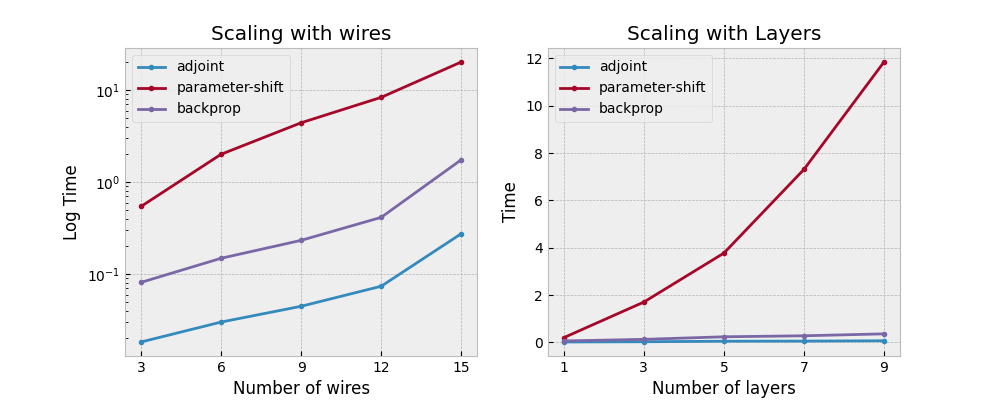\
benchmark results from pennylane demo

Both pennylane and tf quantum provide fast adjoint simulation and the overall performance in best configuration is almost the same. This is demonstrated by our tests (see plot below). Source code for benchmarks reproducing is located in `qml_frameworks_benchmarking`

<img src="img/benchmarks.png" width=400>\
frameworks speed comparison.

## Closing remark
These frameworks are also able to simulate realistic noise, they are compatible with wide range of quantum hardware providers (see table below for comparison)


| **Company**                 | **TensorFlow(cirq) support** | **PennyLane Support** | **# qubits** |
|-----------------------------|------------------------------|-----------------------|--------------|
| IBM                         | - ([link 2020](https://quantumcomputing.stackexchange.com/questions/14164/can-i-run-cirq-on-ibmq))| +                     | 127(up to 7 free)|
| Amazon Braket               |                              | +                     |              |
| Google(Cirq)                | +                            | +                     | 53           |
| Microsoft                   | +                            | +                     | ?            |
| Honeywell (Quantinuum)      |                              | +                     | 20           |
| IonQ                        | +                            | +                     | 34           |
| Alpine Quantum Technologies | +                            | +                     |              |
| Rigetti                     | +                            | +                     | 80           |
| Pasqal                      | +                            | +(through cirq)       | 100          |
| Xanadu                      |                              | +                     | 200+         |

Although these frameworks are pretty similar,  there is one notable difference. The hallmark of Pennylane is the support of Continuous Variable quantum computing, which is a topic of the next section. 


## Reference

Aleksandrowicz, Gadi, Thomas Alexander, Panagiotis Barkoutsos, Luciano Bello, Yael Ben-Haim, David Bucher, Francisco Jose Cabrera-Hernández, et al. 2019. “Qiskit: An Open-Source Framework for Quantum Computing.” Zenodo. https://doi.org/10.5281/zenodo.2562111.

Bergholm, Ville, Josh Izaac, Maria Schuld, Christian Gogolin, Shahnawaz Ahmed, Vishnu Ajith, M. Sohaib Alam, et al. 2022. “PennyLane: Automatic Differentiation of Hybrid Quantum-Classical Computations.” arXiv. https://doi.org/10.48550/arXiv.1811.04968.

Broughton, Michael, Guillaume Verdon, Trevor McCourt, Antonio J. Martinez, Jae Hyeon Yoo, Sergei V. Isakov, Philip Massey, et al. 2021. “TensorFlow Quantum: A Software Framework for Quantum Machine Learning.” arXiv. https://doi.org/10.48550/arXiv.2003.02989.


# Continuous Variable Quantum Computing

Continuous-variable (CV) quantum information is the area of quantum information science that makes use of physical observables, like the strength of an electromagnetic field, whose numerical values belong to continuous intervals.

Practically in CV instead of each qubit there is quantum harmonic oscillator.

## Single qumode
Quantum harmonic oscillator is, as well as classical one, a model of particle moving in quadratic potential, but with consideration of quantum effect, which occurs at very low energies.
So full system energy (Hamiltonian) is
$$
\hat{H}=\frac{\hat{p}^2}{2}+\frac{\hat{x}^2}{2}=-\hbar^2 \frac{\mathrm{d}^2}{\mathrm{~d} x^2}+\frac{x^2}{2}
$$
where $\hat{p}$ is momentum operator, $\hat{x}$ -- position operator and mass of the particle is assumed to be 1.


For example particle can not be in specific point of space, but instead is described by probability of being in different points and has minimal uncertainty in position. That's why particle can't be in zero point with zero energy, but instead has a ground state with minimal but positive energy. This state is called vacuum state and can be visualized as a standard gaussian with zero mean and unit standard deviation.

This and further states visualization are from [xanadu demo](https://strawberryfields.ai/photonics/demos/run_gate_visualization.html)

<img src="img/vac_state.png?0" width=400>\
vacuum state visualization

On the picture above you can see quasi-probability distribution. Horizontal axes are $\hat{p}$ and $\hat{x}$ quadratures, and vertical axis is quasi-probability. "Quasi" here means that in some regions is can be negative, and for some states it can be not a function at all (in the same sense as $\delta$-function is not a function). Negativity of Wigner function is equivalent to quantum contextuality (Booth, Chabaud, and Emeriau 2022). But it is connected to normal probability function by property, that marginal probabilities are probabilities of getting corresponding quadrature (up to $1/2$ factor)

$$\frac{1}{2} \int_{-\infty}^{+\infty} \mathrm{d} p W(x, p)=\langle x|\varrho| x\rangle$$
where $W$ is quasi-probability Wigner function, $\varrho$ -- is a quantum state vector, and right-hand sight expression as a whole is probability density in $\hat{x}$ quadrature measurement outcome probability distribution.

The simplest operations with such states are called gaussian operation (as they transform gaussian to gaussian)

Namely, rotation gate \
<img src="img/rotation.gif">

displacement gate \
<img src="img/displacement.gif">

and squeezing gate \
<img src="img/squeezing.gif">

There are more complicated gates, that can result in negative Wigner function, for example\
Cubic Phase and Kerr Gates\
<img src="https://strawberryfields.ai/photonics/_images/cubicphasegif.gif"><img src="https://strawberryfields.ai/photonics/_images/kerrgif.gif">

But they are more difficult to work with on quantum device. Also their simulation is more computationally expensive. To simulate gaussian operations, matrix multiplications with $n\times n$ covariance matrix and $1\times n$ means vector is enough, while exact simulation of general operations is impossible. Each qumode has countable basis, so simulators are limited to a few lowest basis states and track amplitudes of corresponding states. And still computational complexity for such approximate simulation scales as $k^n$, where $k$ is number of tracked basis states, and $n$ - number of qumodes, while discrete quantum computing simulation scales like $2^n$.


More in depth and comprehensive theoretical introductions can be found in (Adesso, Ragy, and Lee 2014; Brask 2022; Serafini 2017).

## Photonics implementation of CV platform.
Based on [pennylane tutorial](https://pennylane.ai/qml/demos/tutorial_photonics)

Photons are great candidate for quantum information carrier and container, as they almost don't interact with environment and thus don't suffer from decoherence problem.

Photonics is a strongly leading approach to CV implemenation used by Xanadu and PsiQuantum companies.

In context of photonics $\hat{p}$ and $\hat{x}$ quadratures have nothing in common with physical position or speed of photons, but they are abstract features related to light amplitude and phase. The only reason to call them $\hat{p}$ and $\hat{x}$ is uncertainty relation that holds for them and forms the basis of CV QC. 

$$
\left[\hat{x}_j, \hat{p}_k\right]=i \delta_{j k} \hbar
$$
where $\delta_{ij}$ is Kronecker delta, and indexes correspond to qumodes numeration.

Optical waves encoding different CV gaussian states are presented in the figure below

<img src="img/squeezed_light.jpg" height=500>\
[wikipedia image](https://en.wikipedia.org/wiki/Squeezed_states_of_light)

### Operations implementations

Coherent state (displaced vacuum state) can be directly generated with laser.

Displacement operator can be implemented with auxillary light source and beamsplitter as shown below

<img src="https://pennylane.ai/_images/Displacement.png" width=400>\
displacement operator scheme

Squeezing is done by nonlinear medium

<img src=https://pennylane.ai/_images/Squeezer.png width=400>\
squeezing scheme

And finally quadrature measurement (also referred as a homodyne measurement) can be conducted with such operator

<img src=https://pennylane.ai/_images/Homodyne.png width=400>\
quadrature measurement scheme

### GKP state

Previous schemes used photodetectors as measuring units. Photodetectors measure average intensity and are very simple nonquantum devices. More fancy measurement can be conducted with photon-number resolving detector (PNR), which detects separate photons but works only at really low temperatures.

But with PNR-s as in quantum mechanics measurement affect the whole system, and measuring number of photons is far from computational basis measurement, really interesting states can be obtained.

<img src=https://pennylane.ai/_images/GKP_Circuit.png width=300>\
GKP circuit

For example state known as Gottesman Kitaev Preskil (GKP) (Gottesman et al. 2001) state can be produced.

<img src=https://pennylane.ai/_images/gkp_wigner.png width=300>\
GKP Wigner function

It is a state used to encode qubit inside qumode. This may sound like simplification of computational system, but such encoding is quite noise residual and due to encoding's high redundancy can be used for quantum error corrections without additional qubits usage. 



## Reference

Adesso, Gerardo, Sammy Ragy, and Antony R. Lee. 2014. “Continuous Variable Quantum Information: Gaussian States and Beyond.” Open Systems & Information Dynamics 21 (01n02): 1440001. https://doi.org/10.1142/S1230161214400010.

Brask, Jonatan Bohr. 2022. “Gaussian States and Operations -- a Quick Reference.” arXiv. http://arxiv.org/abs/2102.05748.

Serafini, Alessio. 2017. Quantum Continuous Variables: A Primer of Theoretical Methods. 1st ed. Boca Raton, FL : CRC Press, Taylor & Francis Group, [2017] |: CRC Press. https://doi.org/10.1201/9781315118727.

Booth, Robert I., Ulysse Chabaud, and Pierre-Emmanuel Emeriau. 2022. “Contextuality and Wigner Negativity Are Equivalent for Continuous-Variable Quantum Measurements.” Physical Review Letters 129 (23): 230401. https://doi.org/10.1103/PhysRevLett.129.230401.

D. Gotesman, A. Kitaev, J. Preskill. (2001) “Encoding a qubit in an oscillator”, Phys. Rev. A 64, 012310. https://arxiv.org/abs/quant-ph/0008040



# Quantum Recurrent Unit on Gaussian platform

Contextual Recurrent Network was proposed in (Anschuetz et al. 2023) as an evolution and development of ideas from (Arute et al. 2019). Arute and others considered k-gram quantum models. They showed, that quantum based modification of Bayesian network performs better, than it's classical counterpart.

<!-- ![Performance plots](img/QBayCorrResults.png)\ -->
<img src=img/QBayCorrResults.png width=500>\
Comparison between classical and quantum model from (Arute et al. 2019).

This improvement was explained with quantum correlation, which are hard to capture using classical models.
Authors also provide a proof of expressive power separation in absolute perfect case. They demonstrate, that classical model with the same parameters won't be able to achieve finite KL divergence, while quantum, due to quantum nonlocality and contextuality, at least in theory is able.

Anschuetz et al generalized this proof for neural networks. Quantum model, that they proposed is continuous variable(CV) based. So it is designed to use photonic quantum computer, there instead of every qubit one quantum harmonic oscillator is used.
## QRNN architecture
For simulation and general simplicity author limit model to only gaussian states. State of CV device can be represented by very difficult nongaussian Wigner quasiprobability function. But initial vacuum state is just a gaussian with zero mean and unit dispersion. So if only gaussian operations are used (operations that transform gaussian to gaussian. e.g. shifting or squeezing), state will keep being gaussian. 

So if device has $n$ qumods, it's state is fully characterized by vector of means of length $n$ and $n\times n$ symmetric matrix of covariances. In experiments simulation, that stores these numbers is used.
Then evolution of system is described not by specific set of quantum operators (gates), but by general gaussian unitary operation. In fact just square matrix $W$ with size $n+m$ (where n -- hidden state size, and m -- output size). It is the most general gaussian operation, that can be applied to such system. And this matrix is learned with gradient based technic.

<img src=img/qrnn_visual.png width=500>\
Authors visualization of model (Anschuetz et al. 2023)

To feed the input data to the model, additional $m$ qumods are allocate in quantum device. Input is translated into covariance matrix and means of $m$ qumods via classical fully connected layers. $n$ memory qumod states are also additionally shifted with result of applying another fully connected layer to the input.
Finally the hole $n+m$ size system is transformed with $(n+m) \times (n+m)$ matrix $W$. This mixed memorized information with information obtained on current step.

To get output from this model, expectation values on temporal $m$ qumods are measured.


As a result QRNN performs in natural language translation task slightly better, than classical models in terms of final KL divergence.\
<img src=img/qrnn_res.png width=500>

Independent implementation of QRNN, is presented in `QRNN` folder. It shows results similar to ones reported by the authors.

## Reference
Anschuetz, Eric R., Hong-Ye Hu, Jin-Long Huang, and Xun Gao. 2023. “Interpretable Quantum Advantage in Neural Sequence Learning.” PRX Quantum 4 (2): 020338. https://doi.org/10.1103/PRXQuantum.4.020338.

Arute, Frank, Kunal Arya, Ryan Babbush, Dave Bacon, Joseph C. Bardin, Rami Barends, Rupak Biswas, et al. 2019. “Quantum Supremacy Using a Programmable Superconducting Processor.” Nature 574 (7779): 505–10. https://doi.org/10.1038/s41586-019-1666-5.


# Category theory and ZX-calculus

Category theory is very high level abstract of mathematics, that study mathematical structures and their relations. Although it's very abstract, it's high level of generalization thing allowed to describe objects from different scientific field in a unified terms of closed symmetric monoidal categories. Namely analogies can be shown between physics, topology, logic and computation (Baez and Stay 2011). 

Because of ability to naturally describe quantum mechanics in terms of monoidal categories, there are attempts to introduce to quantum physicists society diagrammatic language for describing quantum circuits (Coecke 2008; 2005). It is argued, that the formalism currently used in quantum mechanics is very suboptimal, since simple identical transformations of the phenomenon recorded by this formalism can be completely non-obvious and indistinct. While with the help of diagrams it becomes clear and obvious.

Examples from (Coecke 2008)

<img src="img/diag1.png?0" width=300>
<img src="img/eq1.png?0" width=400> 

<br>

<img src="img/diag2.png" width=300>
<img src="img/eq2.png?0" width=210> <br>
On the left - diagrammatic representation. On the right - equations representation.

While with boxes on wires it is obvious, that you can move them along the wire, in equation with tensor product representing parallel function applying it is not as obvious.

One practical example of circuit that is relatively successfully visualized with this graphical language is quantum teleportation.

<img src="img/telep_d_1.png" height=200> 
<img src="img/telep_d_2.png" height=200> 
<img src="img/telep_d_3.png" height=200><br>
Different variations of diagrammatic representation of quantum teleportation protocol at different times by Bob Coecke

Representing quantum teleportation as an equation is in fact tedious.
The catch is it only applies to equation representation, while traditionally quantum circuits with gates are used to represent teleportation and other circuits (see figure below)

<img src="img/telep_c.png" width=500> \
Circuit representation of teleportation protocol

Such circuits are also a for of graphical representation of quantum protocol, so it has previously discussed benefits. But it is better, because it is closer to real implementation, while diagrammatic language hides some important details. For example measurements and exchange of results as a classical information between Alice and Bob are obvious in classical circuit, it is hidden in diagrammatic one.


Although diagrammatic representation of circuits didn't change quantum physicist's routine, it's further development -- ZX-calculus has found it's niche. For introduction to ZX-calculus see for example (van de Wetering 2020).

ZX-calculus is build on two simple one-qubit gates (Z and X Pauli rotations) and their multiqubit's generalization which is called spiders. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/ZX-calculus_green_copy_map.svg/160px-ZX-calculus_green_copy_map.svg.png" width=200>\
[wikipedia image](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/ZX-calculus_green_copy_map.svg/160px-ZX-calculus_green_copy_map.svg.png) of 3-leg spider

The beautiful fact is that CNOT gate can be compactly represented with just two 3-leg spiders. 

<img src="img/zx_cnot.png" width=300>\
CNOT picture from (van de Wetering 2020)

And another beautiful property of ZX-calculus -- it doesn't matter how you move this spiders, there is no difference between input and output, so CNOT can be represented as simply two connected in any way(see picture below). And it looks pretty similar to commonly used CNOT representation (last picture in the figure)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/ZX-calculus_cNOT-example.svg/800px-ZX-calculus_cNOT-example.svg.png" hight=200>\
[wikipedia image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/ZX-calculus_cNOT-example.svg/800px-ZX-calculus_cNOT-example.svg.png)

And as 2 Pauli rotation gates and CNOT form a complete set of gates, any circuit can be represented with ZX-calculus.  

There are many publications using ZX-calculus. They are collected at this website https://zxcalculus.com/publications.html . Most practical applications are quantum circuits optimization (Kissinger and van de Wetering 2020) and graph states for measurement based quantum computing representation (Kissinger and van de Wetering 2019).

Any circuit can be represented with ZX-calculus, but at the same time general 'spider' doesn't have a physical representation or analog in common circuit language. So not any ZX-circuit is represented by some normal circuit. This gives additional freedom, which helps in circuit optimization task.
Also as there are only few basic elements in ZX-calculus (in contrast to many different redundant circuit gates) number of rules for transforming ZX-calculus circuits is less than 10, which also very convenient for automated circuits optimization. 
It is claimed by Bob Coecke that because of simplicity of these set of rules, people should be learned ZX-calculus instead of regular gates. But because of simplicity of base elements of zx calculus, lot's of spiders can be required to construct a simple practically useful gate. For computer it is not a problem, but for human being it is inconvenient and provokes mistakes.


## Reference

Baez, J., and M. Stay. 2011. “Physics, Topology, Logic and Computation: A Rosetta Stone.” In New Structures for Physics, edited by Bob Coecke, 95–172. Lecture Notes in Physics. Berlin, Heidelberg: Springer. https://doi.org/10.1007/978-3-642-12821-9_2.

Coecke, Bob. 2005. “Kindergarten Quantum Mechanics.” arXiv. https://doi.org/10.48550/arXiv.quant-ph/0510032.\
———. 2008. “Introducing Categories to the Practicing Physicist.” arXiv. https://doi.org/10.48550/arXiv.0808.1032.

Wetering, John van de. 2020. “ZX-Calculus for the Working Quantum Computer Scientist.” arXiv. http://arxiv.org/abs/2012.13966.

Aleks Kissinger and John van de Wetering. 2020 “Reducing T-count with the ZX-calculus.” arXiv. https://arxiv.org/abs/1903.10477

Kissinger, Aleks, and John van de Wetering. 2019. “Universal MBQC with Generalised Parity-Phase Interactions and Pauli Measurements.” Quantum 3 (April): 134. https://doi.org/10.22331/q-2019-04-26-134.



# Quantum Graph models review

| Name                | Paper link/name                                                                                                       | Author                  | Param # | MUTAG        | PROTEINS                     | IMDB-BIN     | PTC(MR)      | D&D        | NCI1         | Code availability                                                                         |
|---------------------|-----------------------------------------------------------------------------------------------------------------------|-------------------------|---------|--------------|------------------------------|--------------|--------------|------------|--------------|-------------------------------------------------------------------------------------------|
| egoQGNN             |                                                                                                                       | Ai, Zhang, Hancock      |      43 | 85.83 ± 3.7  | 79.78 ± 4.7                  |              |              |            |              | No                                                                                        |
| GraphQNTK           |                                                                                                                       | Tang, Yan               |       0 | 88.4 ± 6.5   | 71.1 ± 3.2                   | 73.3 ± 3.6   | 62.9 ± 5.0   |            |              | Yes                                                                                       |
| AttentionGNTK       |                                                                                                                       |                         |         | 90.0 ± 8.5   | 76.2 ± 3.8                   | 76.9 ± 3.2   | 66.2 ± 5.1   |            |              |                                                                                           |
| QS-CNN              | 2019 Quantum-based subgraph convolutional neural networks                                                             | Zhang, Bai, Hancock     |         | 93.13 ± 4.67 | 78.80 ± 4.63 (top 10 today!) |              | 65.99 ± 4.43 |            |              | No.                                                                                       |
| GBS                 | Measuring the similarity of graphs with a Gaussian boson sampler                                                      | Schuld                  |       0 | 86.41 ± 0.33 | 66.88 ± 0.22                 | 68.71 ± 0.59 | 59.14 ± 1.72 |            |              | the formula is given                                                                      |
| QSGCNN              | 2021 Learning graph convolutional networks based on quantum vertex information propagation                            | Bai, Hancock            |         | 91.32±0.91   | 75.90±0.79                   | 73.62±1.12   | 63.37±1.15   | 81.70±0.92 | 77.50±0.91   |                                                                                           |
| DT-QRW-JSE(QJSK)    | 2017 Quantum kernels for unattributed graphs using discrete-time quantum walks                                        | Bai, Hancock            |         | 83.83 ± 0.49 |                              |              | 58.23 ± 0.80 |            | 67.40 ± 0.20 |                                                                                           |
| CT-QRW-JSE(QJSU)    | 2015 A Graph Kernel based on Jensen-Shannon Representation                                                            | Bai, Zhang, Hancock     |         | 82.72 ± 0.44 |                              |              | 56.70 ± 0.49 |            |              |                                                                                           |
| SFGK                | 2021 Graph kernels encoding features of all subgraphs by quantum superposition https://arxiv.org/pdf/2103.16093.pdf   | Kishi                   |       0 | 87.01 ± 1.20 | -                            | 70.16 ± 0.90 |              |            |              | Yes https://github.com/TRSasasusu/GraphKernelEncodingAllSubgraphsQC/blob/main/_calc_QK.py |
| QG-CNN              | 2021 Hybrid Quantum-Classical Graph Convolutional Network                                                             | Samuel Yen-Chi Chen     |     200 | -            | -                            | -            |              |            |              |                                                                                           |
| EQGC                | 2022 Equivariant Quantum Graph Circuits                                                                               | Mernyei, Meichanetzidis |         |              |                              |              |              |            |              |                                                                                           |
| 1HAQJSK             | 2022 Hierarchical-Aligned QuantumJensen-Shannon Kernels for Graph Classification                                      | Bai, Hancock            |         |              |                              |              |              |            |              |                                                                                           |
|                     |                                                                                                                       |                         |         |              |                              |              |              |            |              |                                                                                           |
| Classical baselines |                                                                                                                       |                         |         |              |                              |              |              |            |              |                                                                                           |
| RW                  | Random walks                                                                                                          |                         |         | 88.11 ± 0.70 |                              | 53.64 ± 0.72 |              |            |              |                                                                                           |
| WL                  | “Weisfeiler-lehman graph kernels                                                                                      |                         |         | 90.4 ± 5.7   | 75.0 ± 3.1                   |              |              |            |              |                                                                                           |
table with classical datasets results for different models

## All subgraphs model

All subgraphs quantum graph model for graph classification was introduced in paper "Graph kernels encoding features of all subgraphs by quantum superposition" (Kishi et al. 2022). 
The model is kernel based. It embeds graph into state vector in hilbert space, and than classification is done using standard [SVM kernel trick](https://en.wikipedia.org/wiki/Support_vector_machine). The kernel is just Gram matrix of embeddings in hilbert space. 

### Graph embedding

The main idea is to embed simple properties of a subgraph, like number of vertices or number of edges, into quantum state. Due to properties of quantum computer, qubits can store instantly such information about every subgraph of the embedded graph in the form of superposition.
And furthermore, due to linearity of quantum operators this embedding can be evaluated in parallel for all subgraphs. 
This is called the quantum oracle and this technic is widely used in famous quantum algorithms. In Shor algorithm quantum parallelism is used to raise the same number in multiple powers encoded in superposition to get superposition of the results.
$$|0\rangle + |1\rangle + |2\rangle + ... → |a^0\rangle + |a^1\rangle + |a^2\rangle + ...  $$    
Likewise in this algorithm exponential speedup is achieved, as computations are done instantly for all $2^{\#Edges}$ possible subgraphs.

In such embedding big scalar product will mean, that graphs have many pairs of subgraphs with the same properties.

## Reference:
Kishi, Kaito, Takahiko Satoh, Rudy Raymond, Naoki Yamamoto, and Yasubumi Sakakibara. 2022. “Graph Kernels Encoding Features of All Subgraphs by Quantum Superposition.” IEEE Journal on Emerging and Selected Topics in Circuits and Systems 12 (3): 602–13. https://doi.org/10.1109/JETCAS.2022.3200837.

## Gaussian Boson Sampling Graph model

This graph model was proposed by Xanadu company in (Schuld et al. 2020).
Gaussian boson sampling is an analog of the boson sampling circuit, but for optical, or so called continuous variable quantum platform. Boson sampling is mostly famous for being one of the first circuits to demonstrate quantum advantage  (Arute et al. 2019). And it wasn't intended to do something practically useful.

![GBS circuit](img/gbs_circuit2.png) \
picture from [pennylane demo](https://pennylane.ai/qml/demos/gbs#id1)

In photonic quantum computer each memory/computational unit is not a system with 2 possible energy level, but the quantum harmonic oscillator with countable set of energy levels. And simple family of possible states of each channel is gaussian state. 

Gaussian boson sampling circuit consist of the input, which is squeezing and displacing of gaussian's states. Then there is constant beam splitters part. And finally in the end numbers of detected photons for each channel is counted ($n_1$, $n_2$, $n_3$, ...)

Theory says that probability of getting specific outcome of running GBS circuit is defined by

$$P\left(n_1, n_2 \ldots n_m\right)=\frac{1}{\operatorname{det}(Q)} \frac{\operatorname{Haf}\left(A_s\right)}{\sqrt{n_{1} ! n_{2} ! \cdots n_{m} !}}$$
where all the matrices are defined in terms of the covariance matrix of the gaussian state $\Sigma$ :

$$
\begin{array}{r}
Q=\Sigma+\mathbb{1} / 2 \\
A=X\left(\mathbb{1}-Q^{-1}\right) \\
X=\left[\begin{array}{ll}
0 & \mathbb{1} \\
\mathbb{1} & 0
\end{array}\right]
\end{array}
$$

The $A_s$ matrix is a matrix created from $A$ such that if $n_i=0$, we delete the rows and colums $i$ and $i+m$ of the matrix, and if $n_i \neq 0$, we repeat the rows and columns $n_i$ times.

Hafnian function can be determined mathematically for any symmetric matrix $C$ as

$$
\operatorname{haf}(C)=\sum_{\pi \in P_N^{\{2\}}} \prod_{(u, v) \in \pi} C_{u, v} .
$$
Here, $P_N^{\{2\}}$ is the set of all $N ! /\left((N / 2) ! 2^{N / 2}\right)$ ways to partition the index set $\{1,2, \ldots, N\}$ into $N / 2$ unordered pairs of size 2 , such that each index only appears in one pair. 

In case of applying GBS for graphs more interesting is case, when C is graph adjacency matrix. This lead to more simple interpretation of hafnian as a number of perfect matchings in the graph G. 

A perfect matching is a subset of edges such that every node is covered by exactly one of the edges. The Hafnian therefore sums the products of the edge weights in all perfect matchings. If all edge weights are constant, it simply counts the number of perfect matchings in G.

Therefore this algorithm uses some meaningful graph property for extracting features from the graph. As hafnian computing is a hard task for classical computer, this gives a potential for quantum supremacy.

Finally probabilities of obtaining specific result of gaussian boson sampling are used as a features for SVM kernel to solve classification tasks.


## Reference:
Schuld, Maria, Kamil Brádler, Robert Israel, Daiqin Su, and Brajesh Gupt. 2020. “Measuring the Similarity of Graphs with a Gaussian Boson Sampler.” Physical Review A 101 (3): 032314. https://doi.org/10.1103/PhysRevA.101.032314.

Arute, Frank, Kunal Arya, Ryan Babbush, Dave Bacon, Joseph C. Bardin, Rami Barends, Rupak Biswas, et al. 2019. “Quantum Supremacy Using a Programmable Superconducting Processor.” Nature 574 (7779): 505–10. https://doi.org/10.1038/s41586-019-1666-5.



# Generative models

The starting point of using quantum models for generative tasks was done by two articles published together (Dallaire-Demers and Killoran 2018) more practical and (Lloyd and Weedbrook 2018) more theoretical one.

Authors claimed that quantum models may have an exponential advantage over classical models.

This advantage comes from the fact, that measuring quantum system produces a random sample from exponentially big Hilbert Space.

These have more theoretical importance than practical, because sampling itself is rarely used in quantum machine learning. Most approaches (see for example [pennylane demos](https://pennylane.ai/qml/demonstrations/quantum-machine-learning) ) utilize expectation values of output over each qubit. On the one hand expectation value approach doesn't fully explore the potential of quantum computer. For example it fully ignores quantum correlations over different qubits. But on the other hand this approach is more practical. 

To estimate probabilities of each outcome on real quantum computer, you need exponentially many samples (to keep statistical error $1/\sqrt{n}$ constant with exponentially increasing number of outcomes). At the same time this makes expectation value more noise resistent, which is vital property in NISQ era. Outcomes themselves are only finite set, while in many practical tasks continuous model prediction (like expectation value) is required.
And another significant benefit of expectation value is differentiability. There is a parameter shift technic that replaces infinitely small difference in gradient definition with constant difference. So parameter shift technic makes gradient estimation base on medium number of samples averaging possible. 

Despite these difficulties, there are several attempts to demonstrate any quantum advantage with generative models on practical tasks.

## Molecules generation

One of the attempts is done in QuMolGAN paper (Li, Topaloglu, and Ghosh 2021). Authors took classical GAN model for generating molecules MolGAN (N. De Cao, De Cao, and Kipf 2018), and inserted small (2-4 qubit) quantum circuit in the beginning of the generator. After the quantum circuit goes normal classical layers. That's why authors call their model Quantum GAN with hybrid generator.

Authors conclude, that their quantum model is more efficient, than classical one. And quantum model can be reduced to only 15% of parameters to show performance comparable with results of nonreduced classical model. 

During training stage Fréchet distance was measured (see figure below)

<img src=img/qumolgan_a_plots.png width=500>\
authors plot with learning of quantum and classical GANs.

By dint of code, provided by author, we reproduced model learning.

Unfortunately, proper results visualization shows, that there is no significant advantage of quantum model over comparable classical counterpart.

In terms of Fréchet distance Quantum Mean Reduced (MR) model shows even worse performance, than Classical MR model, which can be seen on smoothed plots below

<img src=img/qumolgan_my_plots.png?0 width=500>

Moreover, plot of validity score (fraction of valid molecules from generated) shows, that for all models after certain moment there are only vanishingly few number of valid molecules.

<img src=img/qumolgan_my_plots_validity.png width=500>

In QuMolGAN quantum part was used as a parameterized quantum circuit (PQC), which means, that expectation values were used as a quantum circuit output. In such configuration output is fully determined by parameters of PQC (angles of qubit rotations). To get any randomness, required for generative model, part of the parameters were replaced with random numbers. In this sense, model work pretty like classical GANs, that just transform input distribution to some distribution similar to target one.

Another worth mentioning technic, used in this paper is patching of quantum circuit. 

To generate random vector of specific size with quantum circuit, this vector is divided into $k$ equal parts. And each part is generated separately with small quantum circuits. This approach gives less expressive, as it is a strong restriction to possible circuits width, and size of used Hilbert space is rather small. But it can be necessary in circumstances of NISQ era with quantum devices strongly limited in number of physical qubits, and with classical simulators limited with number of achievable qubits to simulate. With constant device requirement this technic increases dimensionality of output to values closer to practically applicable. 

With molecule generation this idea hasn't shown any advantage, but it was successfully applied in earlier work (Huang et al. 2021).

## Entire Image Generation

<img src="img/patched_gan.png" width=300>\
authors visualization of their model

Patch technic was applied to generate raw images of digits without any classical postprocessing. Even with patch simplification, authors had to downscale images to 8x8 pixels.

<img src="img/101.png" width=900>\
Authors results of generating 0 and 1 digits.

Authors use very simple quantum circuit, and they supply classical random noise to get random output. But remarkably they use probabilities of each outcome as an output. Not expectation values, like in many other works. 5 qubits was used, one of which is ancillary, and 4 output qubits. This gives $2^4=16$ output values. Ancillary qubit gives additional nonlinearity for measured output. As mentioned above, this increases required number of measurements (authors used 3000 samples). But it exponentially increases dimensionality of output data and better unleashes potential of quantum computer.

## Compressed images generation

In QuGAN paper (Stein et al. 2021) authors compressed digits images to low dimensional (2-4 dimensions) space by principal component analysis (PCA). This makes the task extremely simple, but at the same time more controllable and convenient for experiments.


<img src="img/real.png" height=80>\
<img src="img/1.png" height=80>\
<img src="img/2.png" height=80>\
<img src="img/3.png" height=80>\
<img src="img/4.png" height=80>\
<img src="img/6.png" height=80>\
<img src="img/10.png" height=80>\
Demonstration of PCA compression + decompression with different numbers of dimension.

<img src="img/pca_dist.png" height=300>\
Distribution of PCA compressed data points (first 2 dimensions)

On the picture above you can see visualization of all 10 digits, but only three digits (3,6,9) where used in experiments.

### Model architecture
In some sense this model is the most quantum among discussed here. It doesn't use classical random noise as an input, but uses quantum random. But they use quantum random in quite specific way.
For $n$ dimensional compression $n$ qubit circuit is used. Instead of estimating expectation value over qubits by averaging hight number(~1000) of samples, they average medium (20-30) number of samples. So to certain extend this produces expectation value with significant statistical uncertainty. This results in some distribution. In corner case of 1 sample procedure will result in discrete probability distribution over single measurement outcome ($2^n$ series of "0" and "1"). Corner case of averaging over $\inf$ samples results in one real number from [0, 1] over each of $n$ dimensions. 
Something in between with $m$ samples will result in discrete distribution(binomial distribution) over $m+1$ equally spaced values over each dimension. As it is an averaging of the samples from constant distribution, according to central limit theorem it approaches normal distribution quite fast. 
This means, that such models won't be able to approximate any complicated distribution far from unimodel "normal like" distribution. And furthermore width of distribution (mathematically speaking "dispersion") is mostly determined by number of samples. And number as far as it is integer it can't be learned efficiently with gradient decent. 

Discriminator architecture is also worth mentioning. Discriminator is quantum and represented by another PQC. Discriminator produces $n$ qubits state vector and accesses generator prediction via dot product in Hilbert space. Dot product value is used as a loss function of discriminator and generator. 
Real data samples are fed to discriminator in the same way after encoding to quantum state. They are encoded by simple single qubit rotations so that expectation values over qubits are equal to true values of data sample.   

### Experiments

<img src="img/pca_author.png" height=400>\
author's results visualization

Authors report significant advantage of quantum model over classical GAN in terms of both number of parameters and visual correctness (see figure above)
Source code for quantum model was provided, but due to it's low quality, some error and controversial choice of quantum framework it was reproduced, fixed and complemented by us. Pennylane framework was used instead of qiskit.

Code is available in `QuGAN` folder

It shows, that with right hyperparameter adjust 20 parameter classical generator can approximate distribution much better, than authors of the article showed.

<img src="img/dft_contourf_530_c_20_params_id=25.png" height=300>\
20 parameter classical model results



## Reference:
Dallaire-Demers, Pierre-Luc, and Nathan Killoran. 2018. “Quantum Generative Adversarial Networks.” Physical Review A 98 (1): 012324. https://doi.org/10.1103/PhysRevA.98.012324.

Lloyd, Seth, and Christian Weedbrook. 2018. “Quantum Generative Adversarial Learning.” Physical Review Letters 121 (4): 040502–040502. https://doi.org/10.1103/physrevlett.121.040502.

Li, Junde, Rasit Topaloglu, and Swaroop Ghosh. 2021. “(QuMolGAN) Quantum Generative Models for Small Molecule Drug Discovery.” arXiv. http://arxiv.org/abs/2101.03438.

N. De Cao, Nicola De Cao, and Thomas Kipf. 2018. “MolGAN: An Implicit Generative Model for Small Molecular Graphs.” ArXiv: Machine Learning, May. https://arxiv.org/abs/1805.11973.

Huang, He-Liang, Yuxuan Du, Ming Gong, Youwei Zhao, Yulin Wu, Chaoyue Wang, Shaowei Li, et al. 2021. “Experimental Quantum Generative Adversarial Networks for Image Generation.” Physical Review Applied 16 (2): 024051. https://doi.org/10.1103/PhysRevApplied.16.024051.

Stein, Samuel A., Betis Baheri, Daniel Chen, Ying Mao, Qiang Guan, Ang Li, Bo Fang, and Shuai Xu. 2021. “QuGAN: A Quantum State Fidelity Based Generative Adversarial Network.” In 2021 IEEE International Conference on Quantum Computing and Engineering (QCE), 71–81. https://doi.org/10.1109/QCE52317.2021.00023.
